<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/AprendizadoMaquina/T%C3%B3pico%2003%20-%20Aprendizado%20N%C3%A3o%20Supervisionado/T%C3%B3pico_03_Aprendizado_N%C3%A3o_Supervisionado_Segmenta%C3%A7%C3%A3o_de_Clientes_Solu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agrupamento (Clustering)

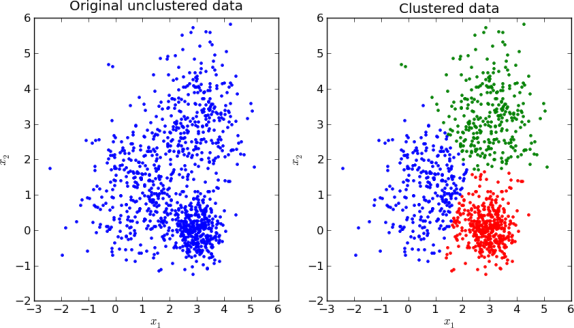

O agrupamento, ou clustering, é uma técnica de mineração de dados que busca agrupar automaticamente dados com base em sua similaridade. O critério de similaridade é definido conforme o problema e o algoritmo utilizado. Os grupos resultantes desse processo são chamados de clusters, aglomerados ou agrupamentos.

# Aplicações e Análises Usando Clustering

O clustering, ou análise de agrupamento, é uma técnica versátil utilizada em várias áreas para identificar padrões e agrupar dados com base em similaridades. Abaixo estão algumas das principais aplicações e exemplos de uso do clustering:

## Aplicações de Clustering

1. **Segmentação de Clientes**
   - **Descrição**: Agrupar clientes com comportamentos ou características semelhantes para marketing direcionado, personalização de serviços e análise de retenção.
   - **Exemplo**: Uma empresa de e-commerce pode segmentar seus clientes com base em padrões de compra para criar campanhas de marketing personalizadas.



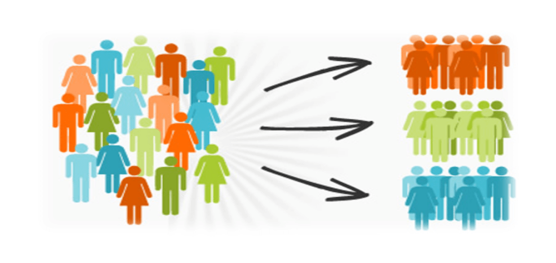


2. **Análise de Imagens**
   - **Descrição**: Agrupar pixels ou regiões de uma imagem com base em características visuais semelhantes para tarefas de segmentação de imagem e reconhecimento de objetos.
   - **Exemplo**: Em diagnósticos médicos, agrupar regiões de uma imagem de raio-X para identificar áreas potencialmente cancerígenas.

3. **Análise de Genética**
   - **Descrição**: Agrupar perfis genéticos para identificar populações ou subgrupos com características genéticas similares.
   - **Exemplo**: Estudos de variação genética para entender a diversidade entre diferentes grupos populacionais.

4. **Análise de Texto e NLP (Processamento de Linguagem Natural)**
   - **Descrição**: Agrupar documentos, frases ou palavras com base em similaridade semântica para sumarização de texto, análise de tópicos e recomendação de conteúdos.
   - **Exemplo**: Agrupar artigos de notícias em tópicos similares para facilitar a navegação e a recomendação de artigos relacionados.

5. **Detecção de Fraudes**
   - **Descrição**: Identificar transações ou atividades suspeitas ao agrupar comportamentos atípicos que podem indicar fraude.
   - **Exemplo**: Instituições financeiras podem usar clustering para detectar padrões de transações que diferem significativamente do comportamento normal do usuário.

6. **Ciências Ambientais**
   - **Descrição**: Agrupar dados ambientais, como medições de qualidade do ar ou temperatura, para identificar padrões e anomalias.
   - **Exemplo**: Agrupar dados de sensores de poluição do ar para identificar áreas com níveis de poluição similares.

7. **Recomendações de Produtos**
   - **Descrição**: Agrupar produtos ou usuários com base em comportamentos de compra semelhantes para melhorar sistemas de recomendação.
   - **Exemplo**: Um serviço de streaming pode agrupar usuários com base em suas preferências de visualização para recomendar novos filmes ou séries.

8. **Análise de Redes Sociais**
   - **Descrição**: Agrupar usuários ou comunidades com base em interações ou interesses comuns para entender a estrutura e a dinâmica das redes sociais.
   - **Exemplo**: Agrupar usuários de uma rede social para identificar comunidades de interesses comuns e analisar como a informação se propaga entre elas.

## Ferramentas e Algoritmos Comuns para Clustering

1. **Algoritmos de Clustering**
   - **K-Means**: Um dos algoritmos de clustering mais populares que particiona os dados em K clusters, minimizando a variância dentro dos clusters.
   - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Agrupa pontos densamente conectados e identifica pontos de ruído (outliers).
   - **Hierarchical Clustering**: Cria uma hierarquia de clusters através de fusões ou divisões sucessivas dos clusters.
   - **Gaussian Mixture Models (GMM)**: Usa uma abordagem probabilística para modelar os dados como uma mistura de distribuições gaussianas.

2. **Ferramentas de Software**
   - **Scikit-learn**: Uma biblioteca Python que oferece implementações eficientes de vários algoritmos de clustering.
   - **R**: Pacotes como `cluster` e `factoextra` fornecem ferramentas para clustering e visualização de dados.
   - **MATLAB**: Oferece funções para realizar clustering e visualizar os resultados de diferentes algoritmos.



#Dataset - Grocery Store Customer Segmetation

The dataset contains 30k samples with the following features:

customer: Anonymized customer's id.

order: Order id, starting from zero.

total_items : The number of items purchased in the order.

discount% : The percent of total discount received. For instance, if the

customer saves €20 in a €100 order (that is, he had to pay €80), this field will contain a 20.

weekday : Day of the week when the order was paid. 1=Monday, 7=Sunday.

hour : The hour of the day the purchase was done. From 00 to 23.

Categories' partials : Percent of money spent in each of the 8 website's main categories:

Food% : Non perishable food, for example: rice, cooking oil, snacks, cookies, sauces, canned food.

Fresh% : Fresh and frozen food, for example: fresh tuna, fruits, frozen pizza, salads, meat.

Drinks% : All kind of beverages, like: water, juices, wine, alcoholic drinks, milk, soy drinks.

Home% : Products for home, from toilet paper to small appliances.

Beauty% : Items for cleaning your body and makeup; for example: shampoo, shaving foam, cosmetics.

Health% : Medicinal solutions that can be sold in Spain without medic prescription: diet pills, condoms, tooth paste.

Baby% : Useful articles if you have a baby: diapers, baby food, baby care.

Pets% : Items related with dogs, cats and other pets; like food, toys, sanitary sand.

##Visualização e Exploração Inicial

In [ ]:
import pandas as pd
pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', 20)

# Carregar o dataset
url = 'https://raw.githubusercontent.com/Hari365/customer-segmentation-python/master/customer_segmentation.csv'
df = pd.read_csv(url)

df.sample(n=10)



Aqui vamos analisar a distribuição e número de grupos. Mas lembre-se, em um caso real de agrupamento este dado não estaria presente.

In [ ]:
import matplotlib.pyplot as plt

unique_counts = df['class'].value_counts()
print(unique_counts)
print(len(unique_counts))

plt.bar(unique_counts.index, unique_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

A quantidade de grupos ('class') é o que queremos descobrir, pois em um dataset não anotado (não-supervisionado) essas classes não existiriam

Portanto, vamos limpar algums atributos:


*   Customer e Order Numbers: Não tem representativade para reconhecer o padrão do cliente
*   Class: É o que queremos de descobrir por agrupamento de padrões de clientes. Então ele não sera considerado.

Logo, os atributos que restam são:





In [ ]:
#Definindo os atributos para agrupamento
attributes = ['weekday', 'total_items', 'discount%', 'Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%', 'Pets%', 'num_orders']

#Slice do dataset
cleaned_df = df[attributes]

#Visualizando o dataset 'limpo'
cleaned_df.sample(n=30)


No dataset acima, vemos algumas inconsistências:


*   'Total_Items' apresenta números não inteiros.
*   Dados não normalizados.

Então vamos processar e ajustá-los



In [ ]:
from sklearn.preprocessing import StandardScaler

#Arredondamos o 'total_items' pois não existem, por exemplo, 46.333 itens
cleaned_df['total_items'] = round(cleaned_df['total_items'])
print(cleaned_df.sample(n=5))

# Normalizamos os dados os dados
scaler = StandardScaler()

#X_scaled é o nosso array de dados
X_scaled = scaler.fit_transform(cleaned_df)

#Convertemos para df apenas para visualização final
df_scaled = pd.DataFrame(X_scaled, columns=cleaned_df.columns)
df_scaled.sample(n=15)


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA

# Aplicar PCA para reduzir para 3 dimensões
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

# Criar um DataFrame com os componentes principais
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Adicionar a coluna 'class' ao DataFrame
principal_df['class'] = df['class']

# Criar a figura com duas subplots lado a lado
fig = px.scatter_3d(principal_df, x='PC1', y='PC2', z='PC3',
                    title='Visualização PCA (sem labels)',
                    color=None)

fig2 = px.scatter_3d(principal_df, x='PC1', y='PC2', z='PC3',
                     title='Visualização PCA (com labels)',
                     color='class')

# Mostrar as figuras lado a lado
fig.show()
fig2.show()


##AGRUPAMENTO (K-MEANS)

Com o dataset limpo e normalizado, agora podemos aplicar o K-Means para avaliar o resultado dos clusteres

Inicialmente escolhemos 10 grupos para comparar com o número de grupos pré-existentes mas que foram excluídos.

In [ ]:
from sklearn.cluster import KMeans

N_CLUSTERS = 10
# Aplicar K-Means nos dados reduzidos
kmeans = KMeans(n_clusters=N_CLUSTERS, init='k-means++', max_iter=300, n_init=10, random_state=0)

#Adicionamos no dataset original, para confrontar
df['Cluster'] = kmeans.fit_predict(X_scaled)

##Visualização

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.express as px

# Aplicar PCA para reduzir a dimensionalidade para 3 componentes principais (Visualização)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Criar um DataFrame com os dados do PCA e as informações de cluster e classe
df_pca = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'PC3': X_pca[:, 2], 'Cluster': df['Cluster'], 'Class': df['class']})

# Agrupar por cluster e contar a ocorrência de cada classe em cada cluster
cluster_class_counts = df_pca.groupby(['Cluster', 'Class'])['Class'].count().unstack().fillna(0)

# Encontrar a classe mais frequente em cada cluster
most_frequent_class_per_cluster = cluster_class_counts.idxmax(axis=1)

# Criar um dicionário que mapeia o número do cluster para a classe correspondente
cluster_class_mapping = most_frequent_class_per_cluster.to_dict()

# Criar o gráfico 3D interativo com Plotly, colorindo os pontos com base na classe mapeada
fig = px.scatter_3d(
    df_pca,
    x='PC1',
    y='PC2',
    z='PC3',
    color=[cluster_class_mapping[cluster] for cluster in df_pca['Cluster']],  # Use a classe mapeada como cor
    title='Segmentação de Clientes com K-Means e PCA (Gráfico 3D Interativo)',
    labels={'x': 'Componente Principal 1', 'y': 'Componente Principal 2', 'z': 'Componente Principal 3'},
    category_orders={'color': sorted(df_pca['Class'].unique())}
)

# Mostrar o gráfico
fig.show()

# Imprimir os counts de cada grupo (cluster)
print("Contagem de Classes por Cluster:")
print(cluster_class_counts)

##Definindo o Número de Agrupamentos (Clusters)
A definição do número de clusters envolve a análise da quantidade de grupos presentes em um conjunto de dados, essencial para a correta segmentação. Esse processo permite avaliar a possível sobre ou sub-segmentação.

A principal questão é: como determinar a segmentação ideal de grupos, considerando que, geralmente, estamos lidando com dados não supervisionados?

Para isso, utilizamos métricas como a inércia e o silhouette score, conforme discutido em aula.

### Computando a Inertia e Silhoute para 2 a 12 grupos

In [ ]:

from sklearn.metrics import silhouette_samples, silhouette_score

clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
silhouettes   = {}
inertias = {}
labels   = {}
for i in clusters:
    kmeans = KMeans(n_clusters=i, n_init=10)  # , algorithm='full')
    kmeans.fit(X_scaled)
    silhouettes[i] = silhouette_score(X_scaled, kmeans.labels_)
    inertias[i] = kmeans.inertia_
    labels[i] = kmeans.labels_

### Análisando a Inertia e Silhoute para 2 a 12 grupos

In [ ]:

import matplotlib.pyplot as plt
# Two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2)

# Inertia
ax1.plot(list(inertias.keys()), list(inertias.values()))
ax1.set_title('Inertia (Elbow Analysis)')

# Silhouette Score
ax2.plot(list(silhouettes.keys()), list(silhouettes.values()))
ax2.set_title('Silhouette Score')

# Spacing
fig.tight_layout()

# X-Axis Label
plt.xlabel('Number of Clusters')

plt.show()

**ATENÇÃO**: O método de elbow não é aplicável ao silhouette score devido à natureza de sua métrica, que não diminui de forma contínua com o aumento do número de clusters e, em vez disso, atinge um ponto ótimo, indicando a melhor definição de clusters.

#Derivada da Inércia

No método elbow, a derivada pode ser utilizada para identificar o ponto de inflexão na curva de inércia em relação ao número de clusters, aumentando a magnitude da variação na taxa de redução. Esse ponto revela onde a diminuição na inércia se torna menos significativa, sugerindo assim o número adequado de clusters.



In [ ]:
import numpy as np
interval = list(inertias.values())
tipo = 'inercia'


#Calcular a primeira derivada
first_derivative = np.diff(np.array(interval))

# Calcular a segunda derivada
second_derivative = np.diff(first_derivative)

print(len(interval),first_derivative.shape,second_derivative.shape)
# Plotar o gráfico de inércia
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(range(2, len(interval) + 2), interval, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title(f'Método {tipo}: Score vs Número de Clusters')
plt.grid(True)

# Plotar a primeira derivada
plt.subplot(1, 3, 2)
plt.plot(range(2, len(interval)+1), -1*first_derivative, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel(f'Primeira Derivada da {tipo}')
plt.title(f'Primeira Derivada da {tipo}')
plt.grid(True)

# Plotar a segunda derivada
plt.subplot(1, 3, 3)
plt.plot(range(2, len(interval)), second_derivative, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel(f'Segunda Derivada da {tipo}')
plt.title(f'Segunda Derivada da {tipo}')
plt.grid(True)

plt.tight_layout()
plt.show()